In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [4]:
path = r'data'

In [5]:
pct = pd.read_csv('data/ap_pct.3.10.21.csv', index_col = 1)

In [6]:
mean = pd.read_csv('data/ap_mean.3.10.21.csv', index_col = 1)

In [7]:
pct.head()
mean.head(20)

,Unnamed: 0,Group,ap+ib_STEM_mean,ap+ib_Literacy_mean,ap+ib_Others_mean,ap+ib_mean
School_Year,,,,,,
2013,0,non-SOCFFEJ,0.366446,0.860927,0.340508,1.567881
2014,1,non-SOCFFEJ,0.327273,0.764675,0.325714,1.417662
2015,2,non-SOCFFEJ,0.370637,0.832649,0.318789,1.522074
2016,3,non-SOCFFEJ,0.369971,0.735525,0.370461,1.475957
2017,4,non-SOCFFEJ,0.335021,0.724344,0.361712,1.421077
2018,5,non-SOCFFEJ,0.348393,0.712156,0.347927,1.408477
2019,6,non-SOCFFEJ,0.366910,0.674111,0.349134,1.390155
2013,7,SOCFFEJ,0.165125,0.423382,0.167768,0.756275
2014,8,SOCFFEJ,0.152500,0.387500,0.165625,0.705625


In [6]:
mask = mean.groupby(['Group']).agg('mean')
mask

,Unnamed: 0,ap+ib_STEM_mean,ap+ib_Literacy_mean,ap+ib_Others_mean,ap+ib_mean
Group,,,,,
AAM,10,0.105713,0.377472,0.104227,0.587412
SOCFFEJ,10,0.163383,0.448837,0.177692,0.789912
non-AAM,3,0.288365,0.647432,0.289444,1.225240
non-SOCFFEJ,3,0.354950,0.757770,0.344892,1.457612


In [7]:
pct1 = pct.drop(['Unnamed: 0'], axis=1)
mean1 = mean.drop(['Unnamed: 0'], axis=1)
pct1.head()

,Group,STEM_pct,Literacy_pct,Others_pct
School_Year,,,,
2013,non-SOCFFEJ,23.372052,54.910243,21.717705
2014,non-SOCFFEJ,23.085379,53.939172,22.975449
2015,non-SOCFFEJ,24.350759,54.704890,20.944351
2016,non-SOCFFEJ,25.066489,49.833777,25.099734
2017,non-SOCFFEJ,23.575130,50.971503,25.453368


In [8]:
pct1.columns = ['Group','STEM_pct','Literacy_pct','Others_pct']
mean1.columns = ['Group','STEM_mean','Literacy_mean','Others_mean','Total_mean']

In [9]:
mean_soc = mean1[mean1['Group'] == 'SOCFFEJ']

In [10]:
mean_nonsoc = mean1[mean1['Group'] == 'non-SOCFFEJ']

In [11]:
mean_aam = mean1[mean1['Group'] == 'AAM']

In [12]:
mean_nonaam = mean1[mean1['Group'] == 'non-AAM']

In [13]:
pct_soc = pct1[pct1['Group'] == 'SOCFFEJ']

In [14]:
pct_nonsoc = pct1[pct1['Group'] == 'non-SOCFFEJ']

In [15]:
pct_aam = pct1[pct1['Group'] == 'AAM']

In [16]:
pct_nonaam =pct1[pct1['Group'] == 'non-AAM']

value count

table1: summary of aggregate course taking by year

SOCFFEJ and AAM table

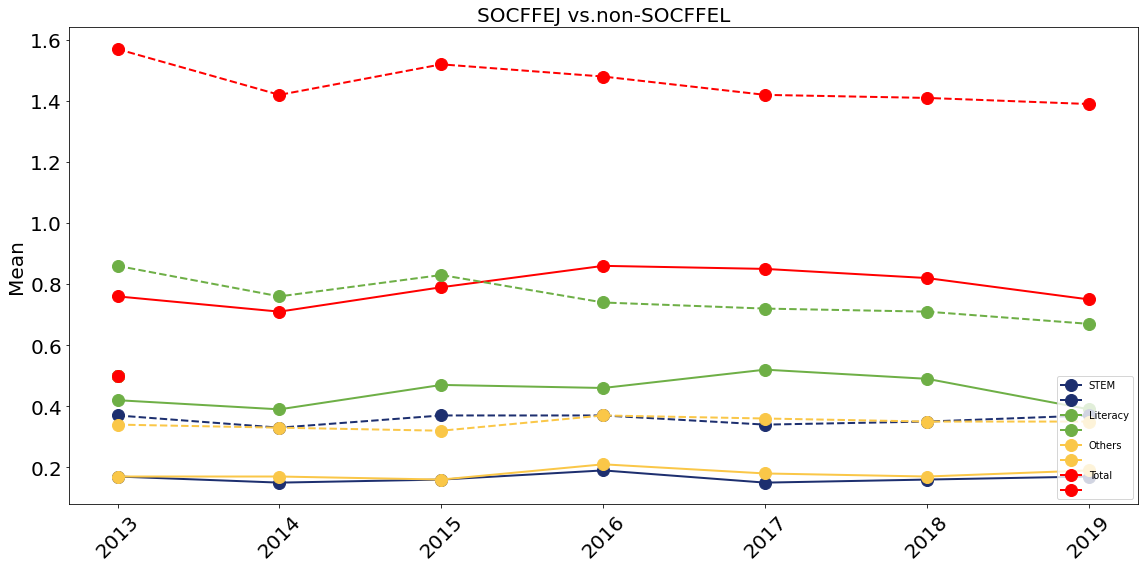

In [111]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
STEM1 = np.array((0.17,0.15,0.16,0.19,0.15,0.16,0.17))
Literacy1 = np.array((0.42,0.39,0.47,0.46,0.52,0.49,0.39))
Others1 = np.array((0.17,0.17,0.16,0.21,0.18,0.17,0.19))
Total1 = np.array((0.76,0.71,0.79,0.86,0.85,0.82,0.75))
STEM2 = np.array((0.37,0.33,0.37,0.37,0.34,0.35,0.37))
Literacy2 = np.array((0.86,0.76,0.83,0.74,0.72,0.71,0.67))
Others2 = np.array((0.34,0.33,0.32,0.37,0.36,0.35,0.35))
Total2 = np.array((1.57,1.42,1.52,1.48,1.42,1.41,1.39))

width = 0.5

fig, ax = plt.subplots(figsize=(16,8))

rects1 = ax.plot(labels, STEM1, width, label='STEM',color = '#1D2F6F',marker='o', linestyle='solid', linewidth=2, markersize=12)
rects2 = ax.plot(labels, Literacy1, width, label='Literacy',color = '#6EAF46', marker='o', linestyle='solid', linewidth=2, markersize=12)
rects3 = ax.plot(labels, Others1, width, label='Others', color = '#FAC748',marker='o', linestyle='solid', linewidth=2, markersize=12)
rects4 = ax.plot(labels, Total1, width, label='Total',color = 'red',marker='o', linestyle='solid', linewidth=2, markersize=12)

rects5 = ax.plot(labels, STEM2, width, label='STEM',color = '#1D2F6F',marker='o', linestyle='dashed', linewidth=2, markersize=12)
rects6 = ax.plot(labels, Literacy2, width, label='Literacy',color = '#6EAF46',marker='o', linestyle='dashed', linewidth=2, markersize=12)
rects7 = ax.plot(labels, Others2, width, label='Others', color = '#FAC748',marker='o', linestyle='dashed', linewidth=2, markersize=12)
rects8 = ax.plot(labels, Total2, width, label='Total',color = 'red',marker='o', linestyle='dashed', linewidth=2, markersize=12)

ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

ax.set_ylabel('Mean',size = 20)
ax.set_xlabel("",size = 20)
ax.set_title('SOCFFEJ vs.non-SOCFFEL',size = 20)
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(['STEM','','Literacy','','Others','','Total',''],loc=4, prop={'size': 10})

fig.tight_layout()

plt.savefig(r'output/year_socffej_mean.png', dpi=300, bbox_inches='tight')
plt.show()

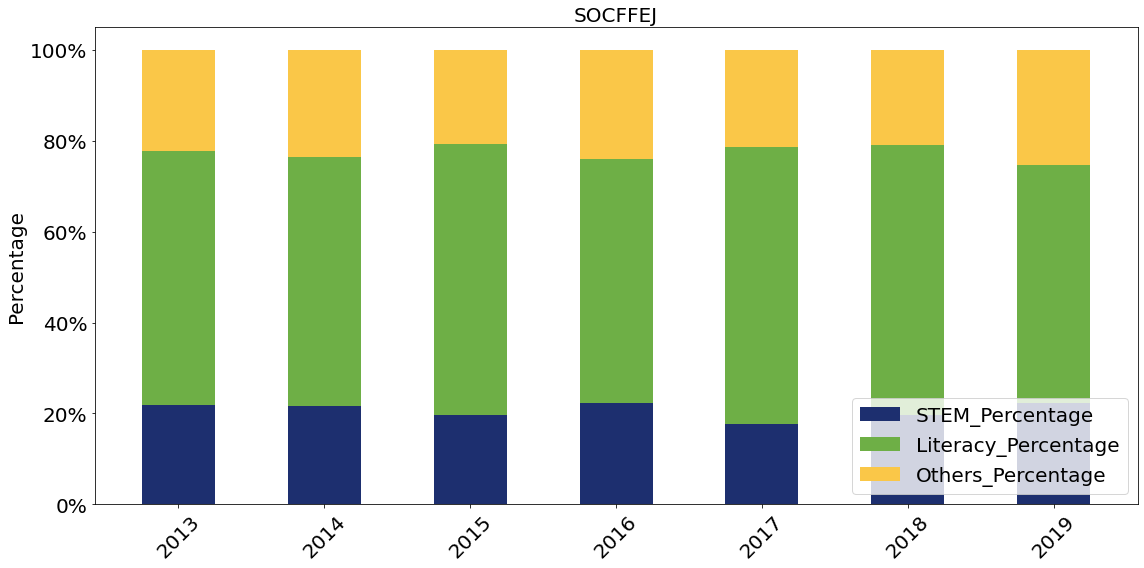

In [79]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
STEM_Percentage = np.array((21.83,21.61,19.68,22.37,17.68,19.67,22.32))
Literacy_Percentage = np.array((55.98,54.92,59.73,53.63,60.96,59.53,52.37))
Others_Percentage = np.array((22.18,23.47,20.59,23.99,21.36,20.80,25.32))

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(figsize=(16,8))

rects1 = ax.bar(labels, STEM_Percentage, width, label='STEM_Percentage',color = '#1D2F6F')
rects2 = ax.bar(labels, Literacy_Percentage, width, bottom=STEM_Percentage, label='Literacy_Percentage',color = '#6EAF46')
rects3 = ax.bar(labels, Others_Percentage, width, bottom=STEM_Percentage+Literacy_Percentage, label='Others_Percentage', color = '#FAC748')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
ax.set_ylabel('Percentage',size = 20)
ax.set_xlabel("",size = 20)
ax.set_title('SOCFFEJ',size = 20)
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(loc=4, prop={'size': 20})

fig.tight_layout()

plt.savefig(r'output/year_socffej_pct.png', dpi=300, bbox_inches='tight')
plt.show()

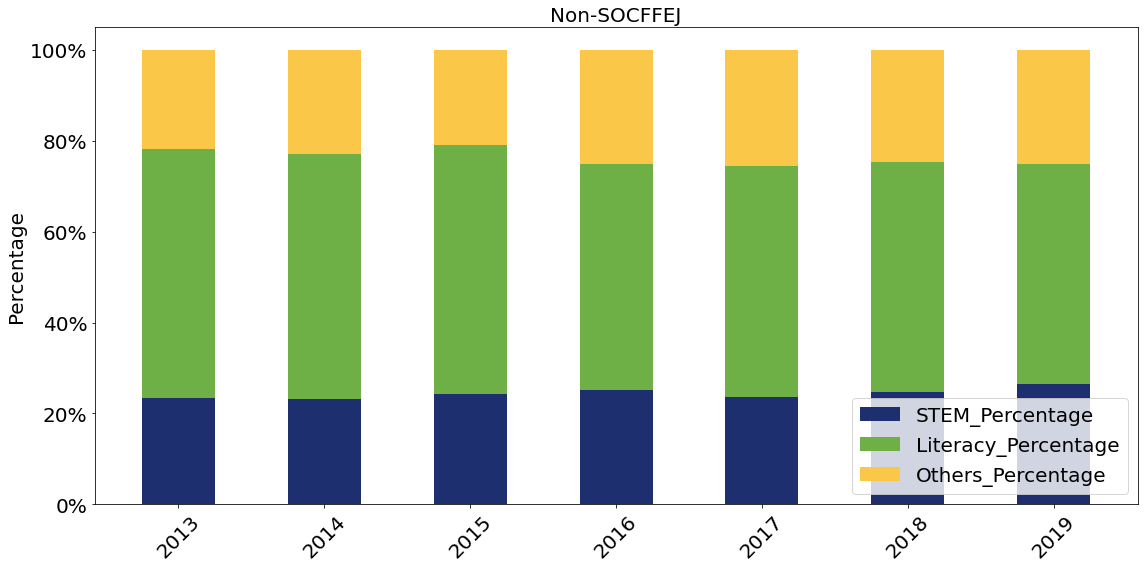

In [104]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
STEM_Percentage = np.array((23.37,23.09,24.35,25.07,23.58,24.74,26.39))
Literacy_Percentage = np.array((54.91,53.94,54.70,49.83,50.97,50.56,48.49))
Others_Percentage = np.array((21.72,22.98,20.94,25.10,25.45,24.70,25.11))

width = 0.5

fig, ax = plt.subplots(figsize=(16,8))

rects1 = ax.bar(labels, STEM_Percentage, width, label='STEM_Percentage',color = '#1D2F6F')
rects2 = ax.bar(labels, Literacy_Percentage, width, bottom=STEM_Percentage, label='Literacy_Percentage',color = '#6EAF46')
rects3 = ax.bar(labels, Others_Percentage, width, bottom=STEM_Percentage+Literacy_Percentage, label='Others_Percentage', color = '#FAC748')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
ax.set_ylabel('Percentage',size = 20)
ax.set_xlabel("",size = 20)
ax.set_title('Non-SOCFFEJ',size = 20)
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(loc=4, prop={'size': 20})

fig.tight_layout()
plt.savefig(r'output/year_nonsocffej_pct.png', dpi=300, bbox_inches='tight')
plt.show()

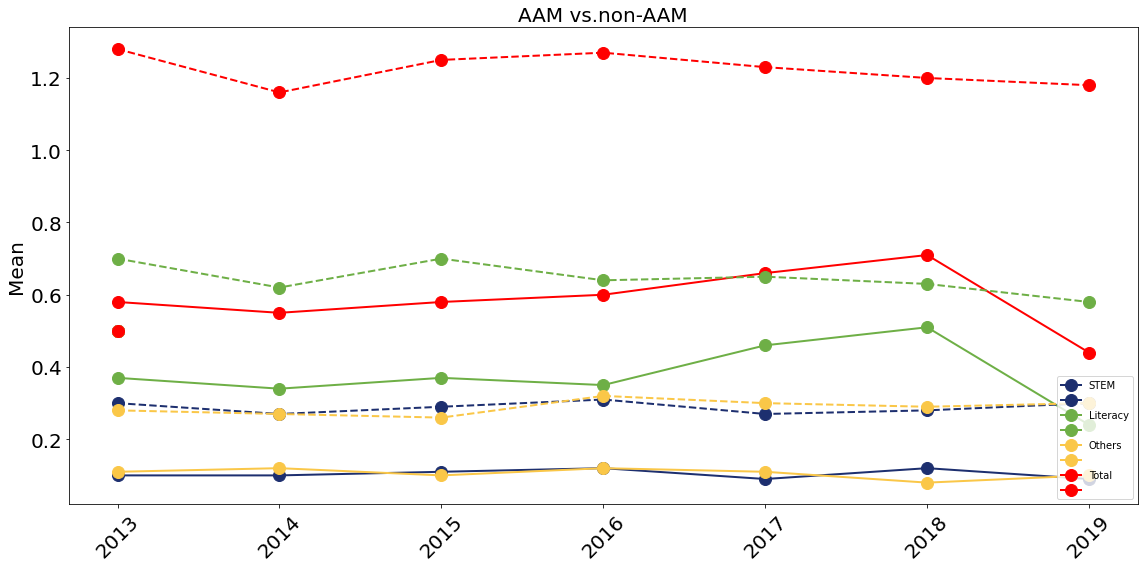

In [110]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
STEM1 = np.array((0.10,0.10,0.11,0.12,0.09,0.12,0.09))
Literacy1 = np.array((0.37,0.34,0.37,0.35,0.46,0.51,0.24))
Others1 = np.array((0.11,0.12,0.10,0.12,0.11,0.08,0.10))
Total1 = np.array((0.58,0.55,0.58,0.60,0.66,0.71,0.44))
STEM2 = np.array((0.30,0.27,0.29,0.31,0.27,0.28,0.30))
Literacy2 = np.array((0.70,0.62,0.70,0.64,0.65,0.63,0.58))
Others2 = np.array((0.28,0.27,0.26,0.32,0.30,0.29,0.30))
Total2 = np.array((1.28,1.16,1.25,1.27,1.23,1.20,1.18))

width = 0.5

fig, ax = plt.subplots(figsize=(16,8))

rects1 = ax.plot(labels, STEM1, width, label='STEM',color = '#1D2F6F',marker='o', linestyle='solid', linewidth=2, markersize=12)
rects2 = ax.plot(labels, Literacy1, width, label='Literacy',color = '#6EAF46', marker='o', linestyle='solid', linewidth=2, markersize=12)
rects3 = ax.plot(labels, Others1, width, label='Others', color = '#FAC748',marker='o', linestyle='solid', linewidth=2, markersize=12)
rects4 = ax.plot(labels, Total1, width, label='Total',color = 'red',marker='o', linestyle='solid', linewidth=2, markersize=12)

rects5 = ax.plot(labels, STEM2, width, label='STEM',color = '#1D2F6F',marker='o', linestyle='dashed', linewidth=2, markersize=12)
rects6 = ax.plot(labels, Literacy2, width, label='Literacy',color = '#6EAF46',marker='o', linestyle='dashed', linewidth=2, markersize=12)
rects7 = ax.plot(labels, Others2, width, label='Others', color = '#FAC748',marker='o', linestyle='dashed', linewidth=2, markersize=12)
rects8 = ax.plot(labels, Total2, width, label='Total',color = 'red',marker='o', linestyle='dashed', linewidth=2, markersize=12)

ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

ax.set_ylabel('Mean',size = 20)
ax.set_xlabel("",size = 20)
ax.set_title('AAM vs.non-AAM',size = 20)
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(['STEM','','Literacy','','Others','','Total',''],loc=4, prop={'size': 10})

fig.tight_layout()

plt.savefig(r'output/year_aam_mean.png', dpi=300, bbox_inches='tight')
plt.show()

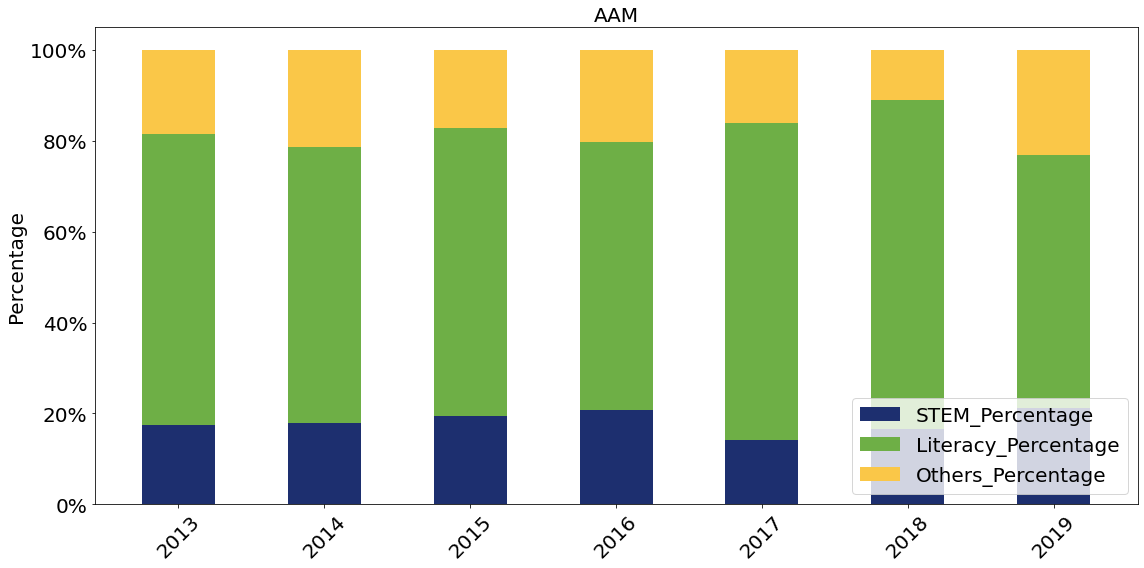

In [78]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
STEM_Percentage = np.array((17.51, 18.01,19.52, 20.76, 14.06, 16.47, 21.21))
Literacy_Percentage = np.array((64.06, 60.66, 63.33, 58.90, 69.88, 72.55, 55.76))
Others_Percentage = np.array((18.43, 21.33, 17.14, 20.34, 16.06, 10.98, 23.03))

width = 0.5

fig, ax = plt.subplots(figsize=(16,8))

rects1 = ax.bar(labels, STEM_Percentage, width, label='STEM_Percentage',color = '#1D2F6F')
rects2 = ax.bar(labels, Literacy_Percentage, width, bottom=STEM_Percentage, label='Literacy_Percentage',color = '#6EAF46')
rects3 = ax.bar(labels, Others_Percentage, width, bottom=STEM_Percentage+Literacy_Percentage, label='Others_Percentage', color = '#FAC748')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
ax.set_ylabel('Percentage',size = 20)
ax.set_xlabel("",size = 20)
ax.set_title('AAM',size = 20)
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(loc=4, prop={'size': 20})

fig.tight_layout()

plt.savefig(r'output/year_aam_pct.png', dpi=300, bbox_inches='tight')
plt.show()

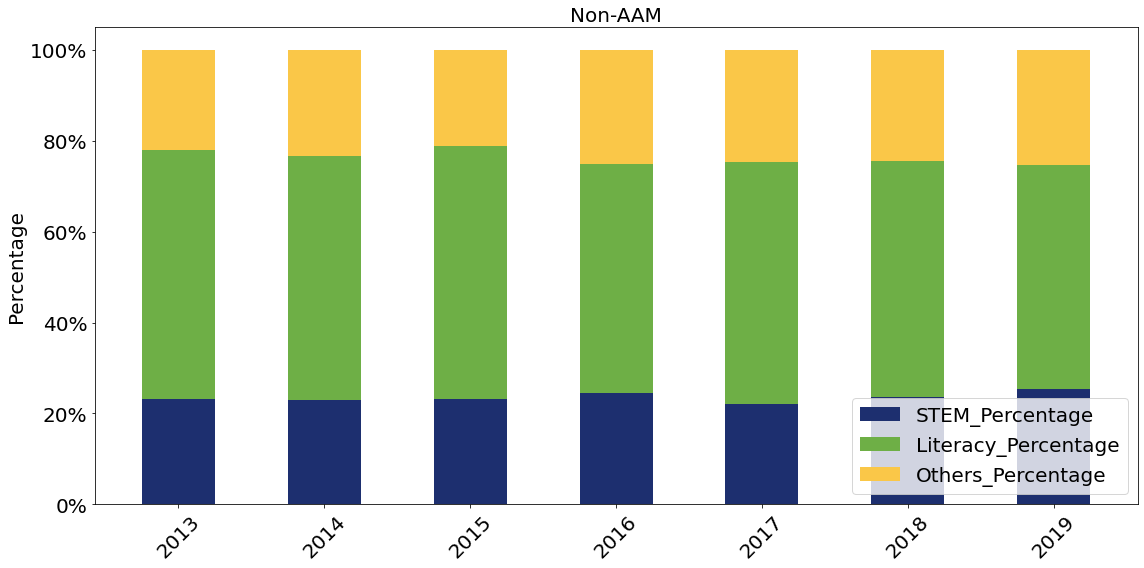

In [77]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
STEM_Percentage = np.array((23.24, 22.92, 23.09, 24.40, 22.15, 23.62, 25.36))
Literacy_Percentage = np.array((54.71, 53.85, 55.88, 50.61, 53.23, 52.08, 49.39))
Others_Percentage = np.array((22.05, 23.22, 21.03, 24.99, 24.63, 24.30, 25.26))


x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(figsize=(16,8))

rects1 = ax.bar(labels, STEM_Percentage, width, label='STEM_Percentage',color = '#1D2F6F')
rects2 = ax.bar(labels, Literacy_Percentage, width, bottom=STEM_Percentage, label='Literacy_Percentage',color = '#6EAF46')
rects3 = ax.bar(labels, Others_Percentage, width, bottom=STEM_Percentage+Literacy_Percentage, label='Others_Percentage', color = '#FAC748')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
ax.set_ylabel('Percentage',size = 20)
ax.set_xlabel("",size = 20)
ax.set_title('Non-AAM',size = 20)
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(loc=4, prop={'size': 20})

## def autolabel(rects):
##     """Attach a text label above each bar in *rects*, displaying its height."""
##     for rect in rects:
##         height = rect.get_height()
##         ax.annotate('{:.2f}'.format(height),
##         xy=(rect.get_x() + rect.get_width() / 3, height),
##        xytext=(0, 2),  # 3 points vertical offset
##         textcoords="offset points",
##        ha='center', va='bottom',size = 20)

## autolabel(rects1)
## autolabel(rects2)
## autolabel(rects3)

fig.tight_layout()
plt.savefig(r'output/year_nonaam_pct.png', dpi=300, bbox_inches='tight')
plt.show()

race group aggregation

In [8]:
ap = pd.read_csv('data/ap_data.3.10.2021.csv', index_col = 0)

In [9]:
ap.shape

(25651, 25)

In [10]:
ap.head()

,StudentID,Academic_Year,SchoolName,SchoolCode,Grade,Gender,ELL,Advanced_Learning,Highly_capable,Special,...,AP_STEM_count,IB_Literacy_count,IB_Others_count,IB_STEM_count,ap_total,ib_total,ap+ib_STEM_count,ap+ib_Literacy_count,ap+ib_Others_count,ap+ib_total
0,5881156,2013,West Seattle High School,19,12,F,Y,N,N,Y,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,6050520,2013,Ingraham International High School,20,12,F,N,N,N,Y,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,5912183,2013,Roosevelt High School,17,12,M,N,N,N,Y,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,6143358,2013,Garfield High School,14,12,F,N,Y,Y,N,...,1.0,NaN,NaN,NaN,4.0,0.0,1.0,1.0,2.0,4.0
4,6147888,2013,Garfield High School,14,12,M,N,N,N,N,...,2.0,NaN,NaN,NaN,4.0,0.0,2.0,1.0,1.0,4.0


In [37]:
race_graph = ap.groupby(['Academic_Year','SchoolName','Race']).agg('mean')

In [38]:
race_graph.head(10)

StudentID  \
Academic_Year SchoolName                             Race                            
2013          Ballard High School                    American Indian  6.983650e+06   
                                                     Asian            6.663752e+06   
                                                     Black            6.530895e+06   
                                                     Hispanic         6.747251e+06   
                                                     Multiracial      6.775841e+06   
                                                     White            6.633572e+06   
              Cascade Parent Partnership             American Indian  6.232060e+06   
                                                     Asian            6.782957e+06   
                                                     White            6.931564e+06   
              Chief Sealth International High School American Indian  6.306006e+06   

                                                                      SchoolCode  \
Academic_Year SchoolName                             Race                          
2013          Ballard High School                    American Indian        11.0   
                                                     Asian                  11.0   
                                                     Black                  11.0   
                                                     Hispanic               11.0   
                                                     Multiracial            11.0   
                                                     White                  11.0   
              Cascade Parent Partnership             American Indian       945.0   
                                                     Asian                 945.0   
                                                     White                 945.0   
              Chief Sealth International High School American Indian        18.0   

                                                                      Grade  \
Academic_Year SchoolName                             Race                     
2013          Ballard High School                    American Indian   12.0   
                                                     Asian             12.0   
                                                     Black             12.0   
                                                     Hispanic          12.0   
                                                     Multiracial       12.0   
                                                     White             12.0   
              Cascade Parent Partnership             American Indian   12.0   
                                                     Asian             12.0   
                                                     White             12.0   
              Chief Sealth International High School American Indian   12.0   

                                                                      AP_Literacy_count  \
Academic_Year SchoolName                             Race                                 
2013          Ballard High School                    American Indian           1.000000   
                                                     Asian                     1.611111   
                                                     Black                     1.000000   
                                                     Hispanic                  1.700000   
                                                     Multiracial               1.800000   
                                                     White                     1.617284   
              Cascade Parent Partnership             American Indian                NaN   
                                                     Asian                          NaN   
                                                     White                          NaN   
              Chief Sealth International High School American Indian             

In [39]:
race_graph.reset_index(inplace = True)

In [40]:
race_graph.head()

,Academic_Year,SchoolName,Race,StudentID,SchoolCode,Grade,AP_Literacy_count,AP_Others_count,AP_STEM_count,IB_Literacy_count,IB_Others_count,IB_STEM_count,ap_total,ib_total,ap+ib_STEM_count,ap+ib_Literacy_count,ap+ib_Others_count,ap+ib_total
0,2013,Ballard High School,American Indian,6.983650e+06,11.0,12.0,1.000000,NaN,1.0,NaN,NaN,NaN,0.428571,0.000000,0.142857,0.285714,0.000000,0.428571
1,2013,Ballard High School,Asian,6.663752e+06,11.0,12.0,1.611111,1.083333,1.0,NaN,NaN,NaN,1.190476,0.000000,0.190476,0.690476,0.309524,1.190476
2,2013,Ballard High School,Black,6.530895e+06,11.0,12.0,1.000000,NaN,NaN,NaN,NaN,NaN,0.160000,0.000000,0.000000,0.160000,0.000000,0.160000
3,2013,Ballard High School,Hispanic,6.747251e+06,11.0,12.0,1.700000,1.000000,1.0,NaN,2.0,2.0,0.675676,0.108108,0.108108,0.459459,0.216216,0.783784
4,2013,Ballard High School,Multiracial,6.775841e+06,11.0,12.0,1.800000,1.000000,1.0,NaN,NaN,NaN,1.380952,0.000000,0.238095,0.857143,0.285714,1.380952


In [16]:
race_graph1 = ap.groupby(['Race']).agg('mean')

In [17]:
race_graph1[['ap+ib_STEM_count','ap+ib_Literacy_count','ap+ib_Others_count','ap+ib_total']]

,ap+ib_STEM_count,ap+ib_Literacy_count,ap+ib_Others_count,ap+ib_total
Race,,,,
American Indian,0.109848,0.367424,0.109848,0.587121
Asian,0.342514,0.575252,0.367145,1.284911
Black,0.107654,0.390220,0.120023,0.617897
Hispanic,0.148765,0.516667,0.160494,0.825926
Multiracial,0.277778,0.666667,0.266667,1.211111
Pacific Islander,0.170732,0.530488,0.146341,0.847561
White,0.358491,0.790280,0.341302,1.490072


In [128]:
race_graph.dtypes

StudentID               float64
Academic_Year           float64
SchoolCode              float64
Grade                   float64
AP_Literacy_count       float64
AP_Others_count         float64
AP_STEM_count           float64
IB_Literacy_count       float64
IB_Others_count         float64
IB_STEM_count           float64
ap_total                float64
ib_total                float64
ap+ib_STEM_count        float64
ap+ib_Literacy_count    float64
ap+ib_Others_count      float64
ap+ib_total             float64
dtype: object

In [185]:
race_graph.head()

,Academic_Year,SchoolName,Race,StudentID,SchoolCode,Grade,AP_Literacy_count,AP_Others_count,AP_STEM_count,IB_Literacy_count,IB_Others_count,IB_STEM_count,ap_total,ib_total,ap+ib_STEM_count,ap+ib_Literacy_count,ap+ib_Others_count,ap+ib_total
0,2013,Ballard High School,American Indian,6.983650e+06,11.0,12.0,1.000000,NaN,1.0,NaN,NaN,NaN,0.428571,0.000000,0.142857,0.285714,0.000000,0.428571
1,2013,Ballard High School,Asian,6.663752e+06,11.0,12.0,1.611111,1.083333,1.0,NaN,NaN,NaN,1.190476,0.000000,0.190476,0.690476,0.309524,1.190476
2,2013,Ballard High School,Black,6.530895e+06,11.0,12.0,1.000000,NaN,NaN,NaN,NaN,NaN,0.160000,0.000000,0.000000,0.160000,0.000000,0.160000
3,2013,Ballard High School,Hispanic,6.747251e+06,11.0,12.0,1.700000,1.000000,1.0,NaN,2.0,2.0,0.675676,0.108108,0.108108,0.459459,0.216216,0.783784
4,2013,Ballard High School,Multiracial,6.775841e+06,11.0,12.0,1.800000,1.000000,1.0,NaN,NaN,NaN,1.380952,0.000000,0.238095,0.857143,0.285714,1.380952


AttributeError: 'Figure' object has no attribute 'yaxis'

<Figure size 432x288 with 0 Axes>

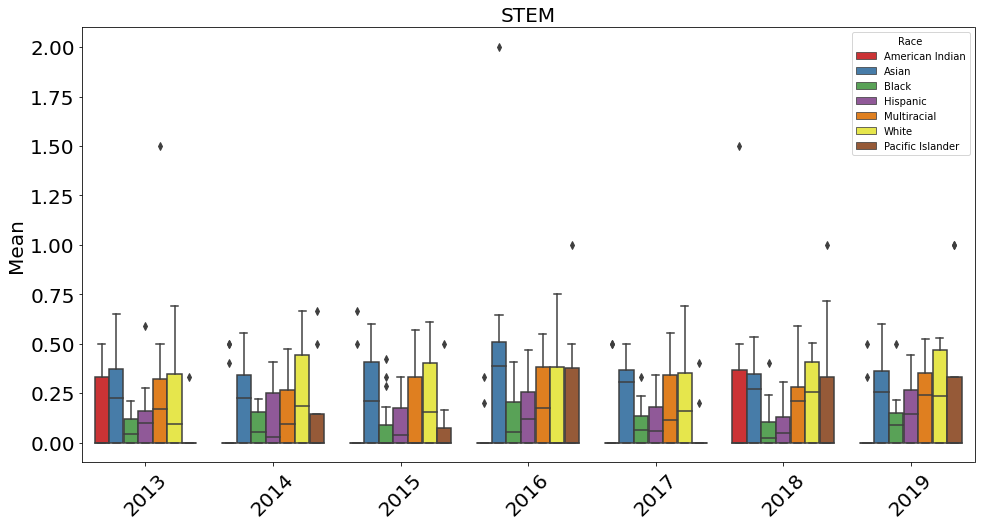

In [24]:
ax = plt.figure()
plt.figure(figsize=(16,8))
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count", hue = 'Race', data=race_graph, width=.8, palette="Set1",)
plt.title('STEM',fontsize=20)
plt.ylabel('Mean',fontsize=20)
plt.xlabel("")
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.savefig(r'output/race_STEM.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-118-55363b5e733e>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax7=plt.subplot(717)


<Figure size 432x288 with 0 Axes>

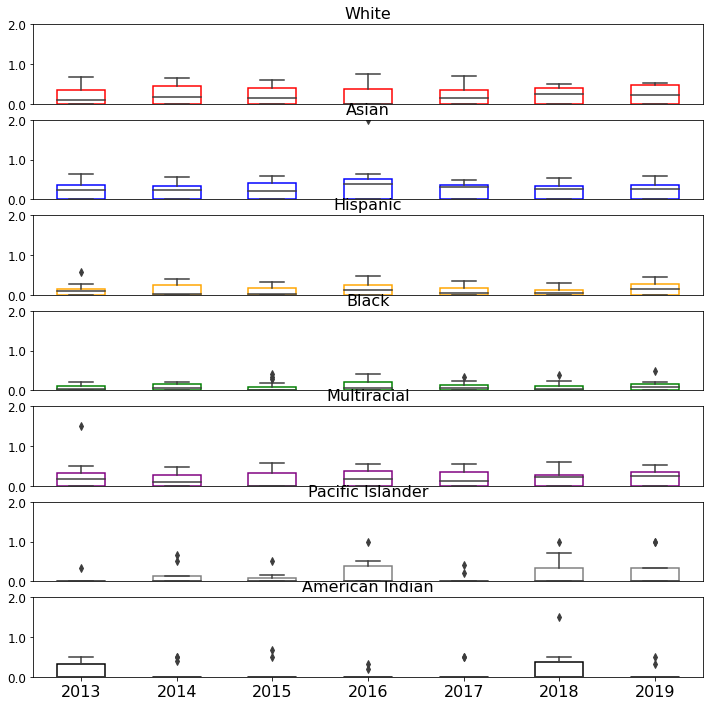

In [118]:
ax = plt.figure()
plt.figure(figsize=(12,12))

plt.subplot(717)

ax1=plt.subplot(711)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'White'], boxprops=dict(facecolor='white',edgecolor = 'red'), width=.5)
plt.title('White',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
plt.yticks(size = 12)
ax1.set_ylim([0.0, 2.0])


ax2=plt.subplot(712)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'Asian'], boxprops=dict(facecolor='white',edgecolor = 'blue'), width=.5)
plt.title('Asian',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
plt.yticks(size = 12)
ax2.set_ylim([0.0, 2.0])



ax3=plt.subplot(713)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'Hispanic'], boxprops=dict(facecolor='white',edgecolor = 'orange'), width=.5)
plt.title('Hispanic',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
plt.yticks(size = 12)
ax3.set_ylim([0.0, 2.0])



ax4=plt.subplot(714)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'Black'], boxprops=dict(facecolor='white',edgecolor = 'green'), width=.5)
plt.title('Black',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
plt.yticks(size = 12)
ax4.set_ylim([0.0, 2.0])



ax5=plt.subplot(715)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'Multiracial'], boxprops=dict(facecolor='white',edgecolor = 'purple'), width=.5)
plt.title('Multiracial',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
plt.yticks(size = 12)
ax5.set_ylim([0.0, 2.0])


ax6=plt.subplot(716)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'Pacific Islander'], boxprops=dict(facecolor='white',edgecolor = 'gray'), width=.5)
plt.title('Pacific Islander',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
plt.yticks(size = 12)
ax6.set_ylim([0.0, 2.0])



ax7=plt.subplot(717)
sns.boxplot(x="Academic_Year", y="ap+ib_STEM_count",data=race_graph[race_graph['Race'] == 'American Indian'], boxprops=dict(facecolor='white',edgecolor = 'black'), width=.5)
plt.title('American Indian',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks(size = 16)
plt.yticks(size = 12)
ax7.set_ylim([0.0, 2.0])


ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax4.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax5.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax6.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax7.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.savefig(r'output/race_math2.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-117-db4b8d399830>:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax7=plt.subplot(717)


<Figure size 432x288 with 0 Axes>

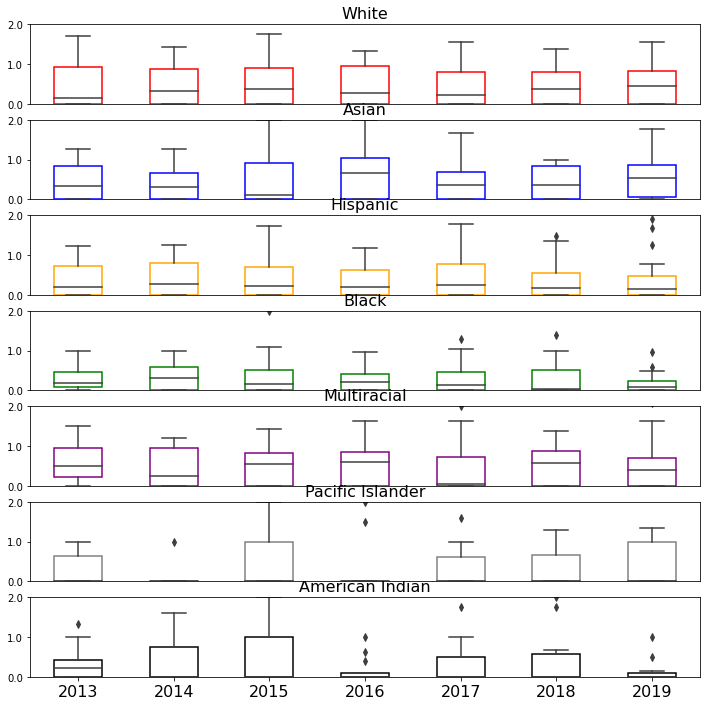

In [117]:
ax = plt.figure()
plt.figure(figsize=(12,12))
plt.title('Literacy',fontsize=16)

plt.subplot(717)

ax1=plt.subplot(711)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'White'], boxprops=dict(facecolor='white',edgecolor = 'red'), width=.5)
plt.title('White',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
ax1.set_ylim([0.0, 2.0])


ax2=plt.subplot(712)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'Asian'], boxprops=dict(facecolor='white',edgecolor = 'blue'), width=.5)
plt.title('Asian',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
ax2.set_ylim([0.0, 2.0])



ax3=plt.subplot(713)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'Hispanic'], boxprops=dict(facecolor='white',edgecolor = 'orange'), width=.5)
plt.title('Hispanic',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
ax3.set_ylim([0.0, 2.0])



ax4=plt.subplot(714)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'Black'], boxprops=dict(facecolor='white',edgecolor = 'green'), width=.5)
plt.title('Black',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
ax4.set_ylim([0.0, 2.0])



ax5=plt.subplot(715)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'Multiracial'], boxprops=dict(facecolor='white',edgecolor = 'purple'), width=.5)
plt.title('Multiracial',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
ax5.set_ylim([0.0, 2.0])


ax6=plt.subplot(716)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'Pacific Islander'], boxprops=dict(facecolor='white',edgecolor = 'gray'), width=.5)
plt.title('Pacific Islander',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks([])
ax6.set_ylim([0.0, 2.0])



ax7=plt.subplot(717)
sns.boxplot(x="Academic_Year", y="ap+ib_Literacy_count",data=race_graph[race_graph['Race'] == 'American Indian'], boxprops=dict(facecolor='white',edgecolor = 'black'), width=.5)
plt.title('American Indian',fontsize=16)
plt.ylabel('')
plt.xlabel("",fontsize=16)
plt.xticks(size = 16)
ax7.set_ylim([0.0, 2.0])


ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax4.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax5.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax6.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax7.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.savefig(r'output/race_literacy2.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

In [75]:
race_graph.groupby('Race')[['ap+ib_STEM_count','ap+ib_Literacy_count','ap+ib_Others_count']].mean()

,ap+ib_STEM_count,ap+ib_Literacy_count,ap+ib_Others_count
Race,,,
American Indian,0.111641,0.366698,0.109766
Asian,0.342479,0.574659,0.367559
Black,0.107553,0.389844,0.119836
Hispanic,0.148902,0.513829,0.159725
Multiracial,0.271867,0.675323,0.259839
Pacific Islander,0.172643,0.515608,0.151130
White,0.358460,0.795085,0.340522


statistic analysis

In [32]:
ap.head()

,StudentID,Academic_Year,SchoolName,SchoolCode,Grade,Gender,ELL,Advanced_Learning,Highly_capable,Special,...,AP_STEM_count,IB_Literacy_count,IB_Others_count,IB_STEM_count,ap_total,ib_total,ap+ib_STEM_count,ap+ib_Literacy_count,ap+ib_Others_count,ap+ib_total
0,5881156,2013,West Seattle High School,19,12,F,Y,N,N,Y,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,6050520,2013,Ingraham International High School,20,12,F,N,N,N,Y,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,5912183,2013,Roosevelt High School,17,12,M,N,N,N,Y,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,6143358,2013,Garfield High School,14,12,F,N,Y,Y,N,...,1.0,NaN,NaN,NaN,4.0,0.0,1.0,1.0,2.0,4.0
4,6147888,2013,Garfield High School,14,12,M,N,N,N,N,...,2.0,NaN,NaN,NaN,4.0,0.0,2.0,1.0,1.0,4.0


In [11]:
ap.columns = ['StudentID', 'Academic_Year', 'SchoolName', 'SchoolCode', 'Grade',\
       'Gender', 'ELL', 'Advanced_Learning', 'Highly_capable', 'Special',\
       'AAM', 'SOCFFEJ', 'Race', 'AP_Literacy_count', 'AP_Others_count',\
       'AP_STEM_count', 'IB_Literacy_count', 'IB_Others_count',\
       'IB_STEM_count', 'ap_total', 'ib_total', 'apib_STEM_count',\
       'apib_Literacy_count', 'apib_Others_count', 'apib_total']

In [12]:
ap.fillna

<bound method DataFrame.fillna of        StudentID  Academic_Year                          SchoolName  \
0        5881156           2013            West Seattle High School   
1        6050520           2013  Ingraham International High School   
2        5912183           2013               Roosevelt High School   
3        6143358           2013                Garfield High School   
4        6147888           2013                Garfield High School   
...          ...            ...                                 ...   
25646    8155449           2019                Garfield High School   
25647    8154165           2019                Franklin High School   
25648    8152658           2019                 Ballard High School   
25649    8127993           2019                 Interagency Academy   
25650    8129494           2019             Nathan Hale High School   

       SchoolCode  Grade Gender ELL Advanced_Learning Highly_capable Special  \
0              19     12      F  

In [13]:
ap_new = ap.replace({'Gender':{'F':0, 'M': 1, 'X':2},
            'ELL': {'Y':1, 'N': 0,'-':0},
            'Special':{'Y':1, 'N': 0,'-':0},
            'AAM': {'Y':1, 'N': 0},
            'SOCFFEJ': {'Y':1, 'N': 0},
            'Advanced_Learning': {'Y':1, 'N': 0},
            'Highly_capable': {'Y':1, 'N': 0},
            'Race':{'White':1, 'Black':2,'Asian':3, 'Hispanic':4, 'Pacific Islander':5,'American Indian':6, 'Multiracial':7}})

In [15]:
ap_new.dtypes

StudentID                int64
Academic_Year            int64
SchoolName              object
SchoolCode               int64
Grade                    int64
Gender                   int64
ELL                      int64
Advanced_Learning        int64
Highly_capable           int64
Special                  int64
AAM                      int64
SOCFFEJ                  int64
Race                     int64
AP_Literacy_count      float64
AP_Others_count        float64
AP_STEM_count          float64
IB_Literacy_count      float64
IB_Others_count        float64
IB_STEM_count          float64
ap_total               float64
ib_total               float64
apib_STEM_count        float64
apib_Literacy_count    float64
apib_Others_count      float64
apib_total             float64
dtype: object

STEM

In [81]:
# Create X and y.
feature_cols =['Gender','ELL','Special','Advanced_Learning','Highly_capable','AAM','SOCFFEJ','Race']
X = ap_new[feature_cols]
y = ap_new.apib_STEM_count

In [82]:
X1 = sm.add_constant(X)
##OLS analysis of Demographic variables on course-taking mean values across the subject categories
est = sm.OLS(y, X1.astype(float)).fit()
print(est.summary())
pdf.output("data/STEM_OLS.pdf")

                            OLS Regression Results                            
Dep. Variable:        apib_STEM_count   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     577.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:20:08   Log-Likelihood:                -14471.
No. Observations:               25651   AIC:                         2.896e+04
Df Residuals:                   25642   BIC:                         2.903e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3320      0.00

NameError: name 'pdf' is not defined

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split

In [84]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [85]:
print(lr.intercept_)
print(lr.coef_)

0.3319594734361816
[ 0.01700317 -0.14734901 -0.22693457  0.24238417  0.19076121 -0.06754366
 -0.08982953 -0.0045836 ]


In [72]:
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state = 123)

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
## calcuate the accuracy
lr.score(x_test,y_test)

0.14494870093753076

Literacy

In [65]:
# Create X and y.
feature_cols =['Gender','ELL','Special','Advanced_Learning','Highly_capable','AAM','SOCFFEJ','Race']
X1 = ap_new[feature_cols]
y1 = ap_new.apib_Literacy_count

In [59]:
X2 = sm.add_constant(X1)
est2 = sm.OLS(y1, X2.astype(float)).fit()
print(est2.summary())
pdf.output("data/Literacy_OLS.pdf")

                             OLS Regression Results                            
Dep. Variable:     apib_Literacy_count   R-squared:                       0.085
Model:                             OLS   Adj. R-squared:                  0.085
Method:                  Least Squares   F-statistic:                     297.1
Date:                 Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:05:26   Log-Likelihood:                -34457.
No. Observations:                25651   AIC:                         6.893e+04
Df Residuals:                    25642   BIC:                         6.900e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8165

NameError: name 'pdf' is not defined

In [66]:
lr = LinearRegression()
lr.fit(X1, y1)

LinearRegression()

In [67]:
print(lr.intercept_)
print(lr.coef_)

0.816482664171853
[-0.09170935 -0.33206885 -0.40928414  0.19717096  0.32210054 -0.00859788
 -0.17055198 -0.0079121 ]


In [73]:
x_train, x_test,y_train,y_test = train_test_split(X1,y1,random_state = 123)

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
## calcuate the accuracy
lr.score(x_test,y_test)

0.0826874060447742

Total

In [74]:
# Create X and y.
feature_cols =['Gender','ELL','Special','Advanced_Learning','Highly_capable','AAM','SOCFFEJ','Race']
X3 = ap_new[feature_cols]
y3 = ap_new.apib_total

In [62]:
X4 = sm.add_constant(X3)
est3 = sm.OLS(y3, X4.astype(float)).fit()
print(est3.summary())
pdf.output("data/Total_OLS.pdf")

                            OLS Regression Results                            
Dep. Variable:             apib_total   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     649.0
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:06:44   Log-Likelihood:                -45644.
No. Observations:               25651   AIC:                         9.131e+04
Df Residuals:                   25642   BIC:                         9.138e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4665      0.02

NameError: name 'pdf' is not defined

In [75]:
lr = LinearRegression()
lr.fit(X3, y3)

LinearRegression()

In [76]:
print(lr.intercept_)
print(lr.coef_)

1.4665148095958147
[-0.07798378 -0.62738508 -0.85795664  0.63916062  0.86557325 -0.14792995
 -0.31922405 -0.01471333]


In [77]:
x_train, x_test,y_train,y_test = train_test_split(X3,y3,random_state = 123)

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
## calcuate the accuracy
lr.score(x_test,y_test)

0.16631348560781778